<a href="https://colab.research.google.com/github/ahffank/DogsandMuffins-Project/blob/master/Model_original/Dogs_and_Donuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#link="https://drive.google.com/file/d/1ApfGnoPjqt70DOKbWmsNdbmy_EMBWv6v/view?usp=sharing"

*# Install the below torch versions as the other versions are throwing out some warnings when fast ai libraries are called.*

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 32.7MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
# from google_images_download import google_images_download  
  
# # creating object 
# response = google_images_download.googleimagesdownload()  

In [ ]:
# google_images_download.googleimagesdownload -k 'baseball game' -s medium -l 10

SyntaxError: ignored

In [ ]:
# arguments = {"keywords": 'cricket ball', 
#                  "format": "jpg", 
#                  "limit":100, 
#                  "print_urls":True, 
#                  "size": "medium", 
#                  "aspect_ratio":"panoramic"} 

# response.download(arguments)


Item no.: 1 --> Item name = cricket ball
Evaluating...
Starting Download...


Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



({'cricket ball': []}, 0)

In [ ]:
#googleimagesdownload -k "baseball game" -s medium -l 500 -o /content/drive/baseball# -i train/baseball -cd ~/chromedriver

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = Path('drive/My Drive/test')

In [ ]:
fnames=get_image_files(path)

In [ ]:
fnames

[PosixPath('drive/My Drive/test/puppy_2.PNG'),
 PosixPath('drive/My Drive/test/puppy_1.PNG'),
 PosixPath('drive/My Drive/test/puppy_5.PNG'),
 PosixPath('drive/My Drive/test/puppy_6.PNG'),
 PosixPath('drive/My Drive/test/muffin_4.PNG'),
 PosixPath('drive/My Drive/test/muffin_5.PNG'),
 PosixPath('drive/My Drive/test/muffin_6.PNG'),
 PosixPath('drive/My Drive/test/muffin_3.PNG'),
 PosixPath('drive/My Drive/test/muffin_2.PNG'),
 PosixPath('drive/My Drive/test/muffin_1.PNG'),
 PosixPath('drive/My Drive/test/puppy_3.PNG'),
 PosixPath('drive/My Drive/test/puppy_4.PNG')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.PNG$'
bs=8

In [ ]:

# pat = r'([\w\s.-]).png$'
# bs=4

In [ ]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [ ]:
data=ImageDataBunch.from_name_re(path,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

In [ ]:
data.train_ds

LabelList (10 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
puppy,puppy,puppy,puppy,muffin
Path: drive/My Drive/test

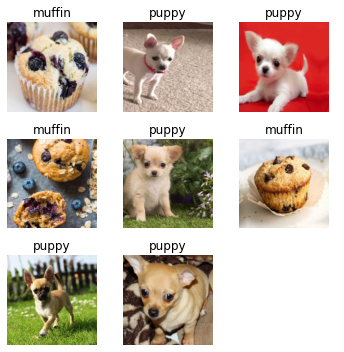

In [ ]:

data.show_batch(rows=4,figsize=(5,5))

In [ ]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.495952,0.003634,0.000000,00:01
1,1.868752,0.000019,0.000000,00:00
2,1.261170,0.000000,0.000000,00:00
3,0.936707,0.000000,0.000000,00:00
4,0.741952,0.000000,0.000000,00:00


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


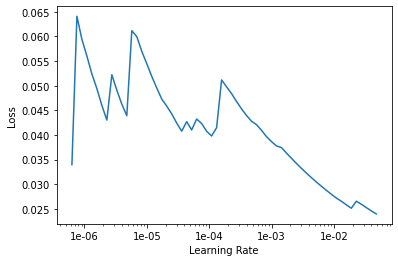

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10,max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,11.955455,0.666667,00:00
1,1.525318,14.157829,0.666667,00:00
2,1.262861,18.501390,0.666667,00:00
3,1.088592,1.674013,0.333333,00:00
4,0.861989,0.000086,0.000000,00:00
5,0.710972,0.000050,0.000000,00:00
6,0.603146,1.809635,0.333333,00:00
7,0.522316,2.071186,0.333333,00:00
8,0.544132,0.005135,0.000000,00:00
9,0.484640,0.000016,0.000000,00:00


In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused()

[]

In [ ]:
interp.confusion_matrix()

array([[2, 0],
       [0, 0]])

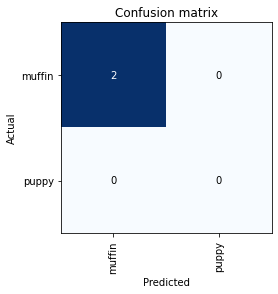

In [ ]:
interp.plot_confusion_matrix()

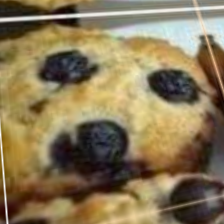

In [ ]:
img = data.train_ds[0][0]
img

In [ ]:

print("This is a "+str(learn.predict(img)[0]))

This is a Muffin


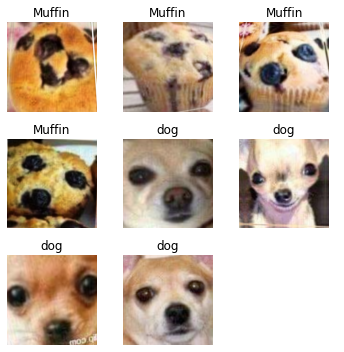

In [ ]:
#data.train_ds

data.show_batch(rows=4,figsize=(5,5))

In [ ]:
if  (str(learn.predict(img)[0]) == 'Category tensor(1)'):
  print("Dog")


In [ ]:
 str(learn.predict(img)[0])

'dog'

In [ ]:
path_test=Path('drive/My Drive/train')

In [ ]:
get_image_files(path_test)

[PosixPath('drive/My Drive/train/Muffin_1.PNG'),
 PosixPath('drive/My Drive/train/dog_1.jpeg'),
 PosixPath('drive/My Drive/train/Muffin_2.PNG'),
 PosixPath('drive/My Drive/train/dog_2.PNG'),
 PosixPath('drive/My Drive/train/dog_3.PNG'),
 PosixPath('drive/My Drive/train/Muffin_3.PNG'),
 PosixPath('drive/My Drive/train/dog_4.PNG'),
 PosixPath('drive/My Drive/train/Muffin_4.PNG'),
 PosixPath('drive/My Drive/train/Muffin_5.PNG'),
 PosixPath('drive/My Drive/train/dog_5.PNG'),
 PosixPath('drive/My Drive/train/Muffin_6.PNG'),
 PosixPath('drive/My Drive/train/dog_7.PNG'),
 PosixPath('drive/My Drive/train/Muffin_7.PNG'),
 PosixPath('drive/My Drive/train/dog_8.PNG'),
 PosixPath('drive/My Drive/train/Muffin_8.PNG'),
 PosixPath('drive/My Drive/train/dog_6.PNG')]

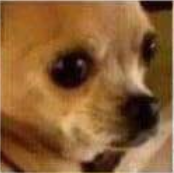

In [ ]:
predict_img = open_image(path_test/'dog_1.jpeg')
predict_img

In [ ]:
print("The prediction of the image is a "+str(learn.predict(predict_img)[0]))

The prediction of the image is a puppy


In [ ]:
#predict_img=predict_img.resize(224).refresh()

In [ ]:
 
learn.export('trained_model.pkl')

In [ ]:
!pwd

/content


In [ ]:
Model=Path('drive/My Drive')

In [ ]:
get_image_files(path)

[PosixPath('drive/My Drive/train/Muffin_1.PNG'),
 PosixPath('drive/My Drive/train/dog_1.PNG'),
 PosixPath('drive/My Drive/train/Muffin_2.PNG'),
 PosixPath('drive/My Drive/train/dog_2.PNG'),
 PosixPath('drive/My Drive/train/dog_3.PNG'),
 PosixPath('drive/My Drive/train/Muffin_3.PNG'),
 PosixPath('drive/My Drive/train/dog_4.PNG'),
 PosixPath('drive/My Drive/train/Muffin_4.PNG'),
 PosixPath('drive/My Drive/train/Muffin_5.PNG'),
 PosixPath('drive/My Drive/train/dog_5.PNG'),
 PosixPath('drive/My Drive/train/Muffin_6.PNG'),
 PosixPath('drive/My Drive/train/dog_7.PNG'),
 PosixPath('drive/My Drive/train/Muffin_7.PNG'),
 PosixPath('drive/My Drive/train/dog_8.PNG'),
 PosixPath('drive/My Drive/train/Muffin_8.PNG'),
 PosixPath('drive/My Drive/train/dog_6.PNG')]

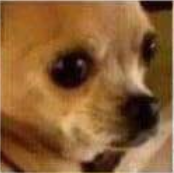

In [ ]:
# learn.predict(open_image(‘imgPath/1.Col_ST_48/IMG_20190801_134227.jpg’))
open_image(path/'dog_1.PNG')

In [ ]:
print(str(learn.predict(img)[0]))

dog
